### LDA(Linear Discriminant Analysis)

### importing the libraries

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### importing Dataset 

In [6]:
dataset = pd.read_csv('Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
dataset.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


### dependent and independent variable

In [42]:
X = dataset.iloc[:,0:13].values
y = dataset.iloc[:,13].values

In [43]:
print(X)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [44]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


### splitting data into train set and test set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [46]:
print(X_train)

[[1.369e+01 3.260e+00 2.540e+00 ... 9.600e-01 1.820e+00 6.800e+02]
 [1.269e+01 1.530e+00 2.260e+00 ... 9.600e-01 2.060e+00 4.950e+02]
 [1.162e+01 1.990e+00 2.280e+00 ... 1.160e+00 2.960e+00 3.450e+02]
 ...
 [1.242e+01 1.610e+00 2.190e+00 ... 1.060e+00 2.960e+00 3.450e+02]
 [1.390e+01 1.680e+00 2.120e+00 ... 9.100e-01 3.330e+00 9.850e+02]
 [1.416e+01 2.510e+00 2.480e+00 ... 6.200e-01 1.710e+00 6.600e+02]]


In [47]:
print(X_test)

[[1.374e+01 1.670e+00 2.250e+00 1.640e+01 1.180e+02 2.600e+00 2.900e+00
  2.100e-01 1.620e+00 5.850e+00 9.200e-01 3.200e+00 1.060e+03]
 [1.279e+01 2.670e+00 2.480e+00 2.200e+01 1.120e+02 1.480e+00 1.360e+00
  2.400e-01 1.260e+00 1.080e+01 4.800e-01 1.470e+00 4.800e+02]
 [1.237e+01 1.130e+00 2.160e+00 1.900e+01 8.700e+01 3.500e+00 3.100e+00
  1.900e-01 1.870e+00 4.450e+00 1.220e+00 2.870e+00 4.200e+02]
 [1.356e+01 1.730e+00 2.460e+00 2.050e+01 1.160e+02 2.960e+00 2.780e+00
  2.000e-01 2.450e+00 6.250e+00 9.800e-01 3.030e+00 1.120e+03]
 [1.305e+01 5.800e+00 2.130e+00 2.150e+01 8.600e+01 2.620e+00 2.650e+00
  3.000e-01 2.010e+00 2.600e+00 7.300e-01 3.100e+00 3.800e+02]
 [1.156e+01 2.050e+00 3.230e+00 2.850e+01 1.190e+02 3.180e+00 5.080e+00
  4.700e-01 1.870e+00 6.000e+00 9.300e-01 3.690e+00 4.650e+02]
 [1.406e+01 2.150e+00 2.610e+00 1.760e+01 1.210e+02 2.600e+00 2.510e+00
  3.100e-01 1.250e+00 5.050e+00 1.060e+00 3.580e+00 1.295e+03]
 [1.236e+01 3.830e+00 2.380e+00 2.100e+01 8.800e+01 2.3

### Feature scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [50]:
print(X_train)

[[ 0.87668336  0.79842885  0.64412971 ...  0.0290166  -1.06412236
  -0.2059076 ]
 [-0.36659076 -0.7581304  -0.39779858 ...  0.0290166  -0.73083231
  -0.81704676]
 [-1.69689407 -0.34424759 -0.32337513 ...  0.90197362  0.51900537
  -1.31256499]
 ...
 [-0.70227477 -0.68615078 -0.65828065 ...  0.46549511  0.51900537
  -1.31256499]
 [ 1.13777093 -0.62316862 -0.91876272 ... -0.18922266  1.03282752
   0.80164614]
 [ 1.4610222   0.12361993  0.42085937 ... -1.45501034 -1.2168803
  -0.2719767 ]]


In [51]:
print(X_test)

[[ 9.38847070e-01 -6.32166068e-01 -4.35010303e-01 -9.19695615e-01
   1.26324041e+00  5.59998633e-01  9.77754158e-01 -1.20637533e+00
   2.36680192e-02  3.39284695e-01 -1.45574805e-01  8.52295413e-01
   1.04940526e+00]
 [-2.42263344e-01  2.67579163e-01  4.20859365e-01  7.12764102e-01
   8.40672358e-01 -1.27747161e+00 -6.05828120e-01 -9.70634096e-01
  -5.87397203e-01  2.42611713e+00 -2.06608025e+00 -1.55017035e+00
  -8.66598582e-01]
 [-7.64438475e-01 -1.11802849e+00 -7.69915825e-01 -1.61767889e-01
  -9.20027861e-01  2.03653722e+00  1.18341419e+00 -1.36353615e+00
   4.48018868e-01 -2.50930538e-01  1.16386073e+00  3.94021597e-01
  -1.06480588e+00]
 [ 7.15057728e-01 -5.78181354e-01  3.46435916e-01  2.75498106e-01
   1.12238439e+00  1.15061407e+00  8.54358136e-01 -1.28495574e+00
   1.43251284e+00  5.07917619e-01  1.16312302e-01  6.16214963e-01
   1.24761256e+00]
 [ 8.09879269e-02  3.08378173e+00 -8.81550999e-01  5.67008770e-01
  -9.90455870e-01  5.92810602e-01  7.20679112e-01 -4.99151627e-01


### Applying LDA

####  LDA is a supervised model
####  here we take 2 new extracted linear independent varible which is linear discriminant with dependent varible

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test  = lda.transform(X_test)

In [53]:
print(X_train)

[[-3.57315552  1.94018924]
 [-0.85475898 -2.08182977]
 [-0.62173655 -3.06234453]
 [-4.80786412  2.00638739]
 [ 3.8579759   0.14987256]
 [ 3.59455458  1.24961706]
 [ 0.53772906 -3.0852704 ]
 [-0.04058577 -2.47312446]
 [-0.99835348 -3.36989668]
 [ 3.74095658  1.94844242]
 [-3.76035226  0.82126218]
 [ 0.15106412 -1.86820292]
 [-3.62762899  2.05460026]
 [ 3.94229781  2.80328429]
 [-3.33429017  0.73627798]
 [-3.90206871  1.03276135]
 [ 3.55835472  0.18783108]
 [-5.63175281  2.40524214]
 [ 5.56217254  0.85694946]
 [-0.23296188 -3.94615581]
 [-5.03141997  3.23313754]
 [-3.52861651  0.94605778]
 [ 1.17815662 -2.17294825]
 [-3.58320131  0.67947364]
 [-5.21649905  2.41090952]
 [ 3.01647841  1.24411621]
 [-1.86178658 -0.47484926]
 [-3.93816398 -0.2204059 ]
 [ 1.0836235  -3.32496762]
 [-1.8691488  -0.63362283]
 [-3.27717205  1.51263542]
 [ 0.47842302 -1.16766723]
 [ 4.14433134  1.37391708]
 [-2.45009727 -2.49336285]
 [ 1.20844631 -2.30679956]
 [-2.55631466 -0.98550214]
 [ 1.6091476   0.55066705]
 

In [54]:
print(X_test)

[[ 3.83960313  1.54567265]
 [-5.24601727  1.72358501]
 [ 0.66064228 -3.32231072]
 [ 2.16667061  1.0147427 ]
 [ 0.16079996 -1.27171643]
 [ 5.31374258 -2.22014536]
 [ 4.78386714  3.11508054]
 [-5.55863966  0.88556084]
 [ 1.29772139 -2.40714074]
 [-0.53068371 -2.37759837]
 [-2.36900593  1.81859204]
 [-5.14502202  1.88061526]
 [ 5.27947032  3.32510044]
 [ 2.70452577 -2.61522323]
 [-4.32314426  2.14569837]
 [ 0.65835601 -4.67751669]
 [ 4.07332713  1.95266123]
 [ 6.55291385  4.01098911]
 [-2.40020179 -1.14618328]
 [ 5.14219986  2.02120623]
 [ 2.46475469 -2.81225673]
 [ 2.5190649   1.07965428]
 [ 1.79798575  0.47987658]
 [ 1.43423986 -2.41298601]
 [-1.11433225 -0.98310413]
 [-0.28604133 -2.81262488]
 [ 1.21198193 -2.73115246]
 [-0.84900431 -3.34996047]
 [ 1.03105294 -0.53029203]
 [-4.83489722  2.08108766]
 [ 4.75464421  2.30157612]
 [ 3.33786142  1.51860576]
 [-1.02045007 -1.04261267]
 [ 3.1347464   2.97819832]
 [ 4.25385909  1.84683986]
 [ 3.16058359 -0.39860037]]


### Visualize the LDA

#### visualize the LDA for train set

Text(0, 0.5, 'LD2')

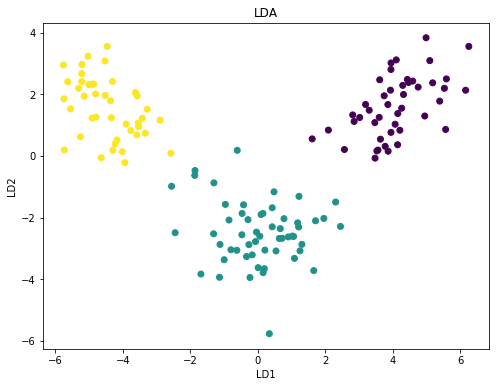

In [58]:
plt.figure(figsize = (8,6))
plt.scatter(X_train[:,0], X_train[:,1],c = y_train)
plt.title('LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')

#### visualize the LDA for test set

Text(0, 0.5, 'LD2')

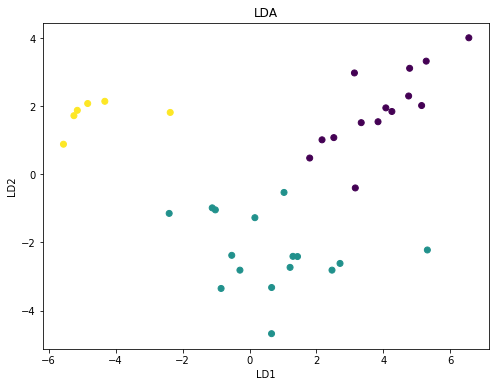

In [60]:
plt.figure(figsize = (8,6))
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.title('LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')

### Fitting Logistic regression on the train set

In [61]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### predict the test set

In [62]:
y_pred = classifier.predict(X_test)

### Evaluate the prediction

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
1.0


### visualizing the training set result

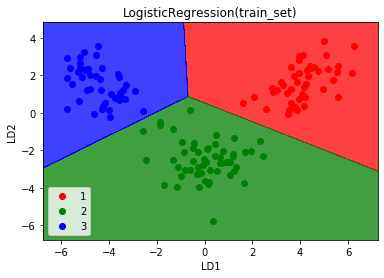

In [67]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start =  X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start =  X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('LogisticRegression(train_set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

### visualizing the test set results

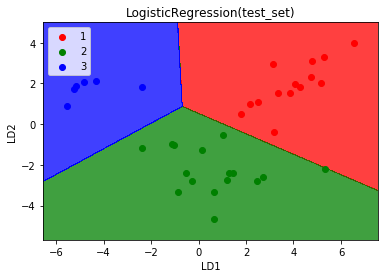

In [68]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start =  X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start =  X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('LogisticRegression(test_set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()